In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('insurance.csv')

In [3]:
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [4]:
data.describe()


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [5]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

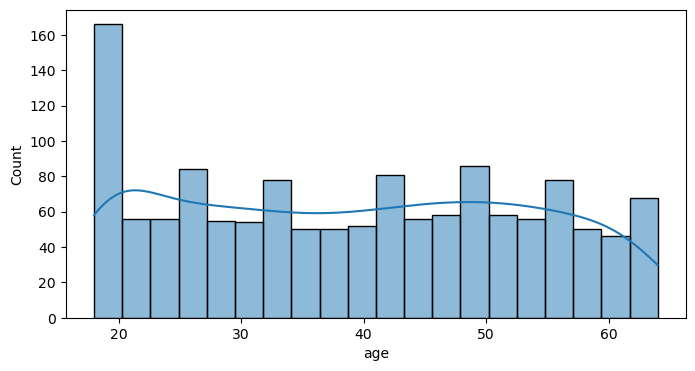

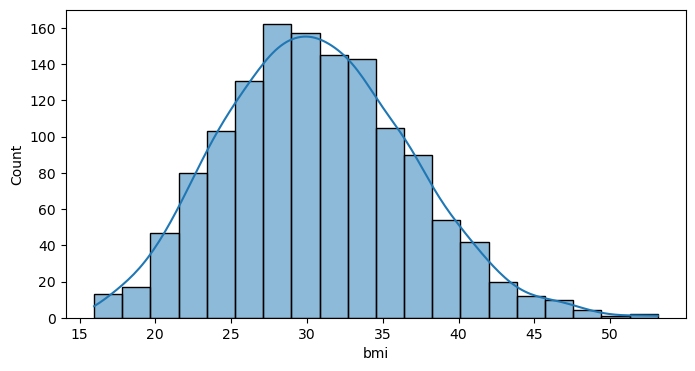

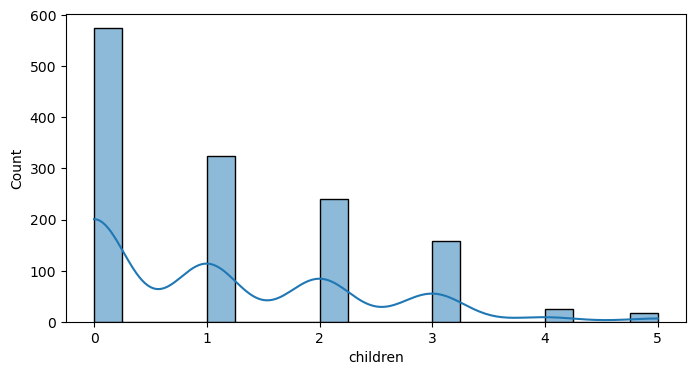

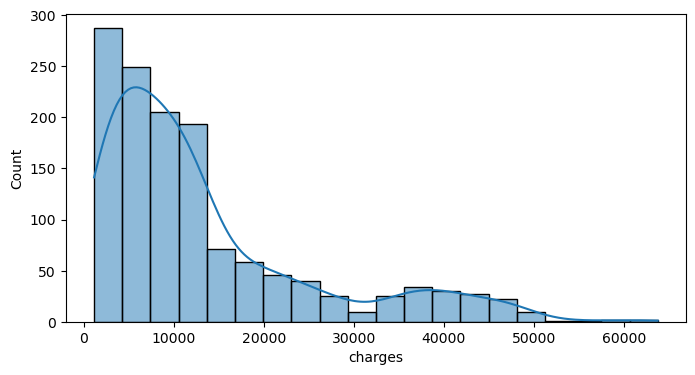

In [8]:
numeric_columns = ['age','bmi','children','charges']
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True,bins=20)
    

In [9]:
data.shape


(1338, 7)

<Axes: xlabel='children', ylabel='count'>

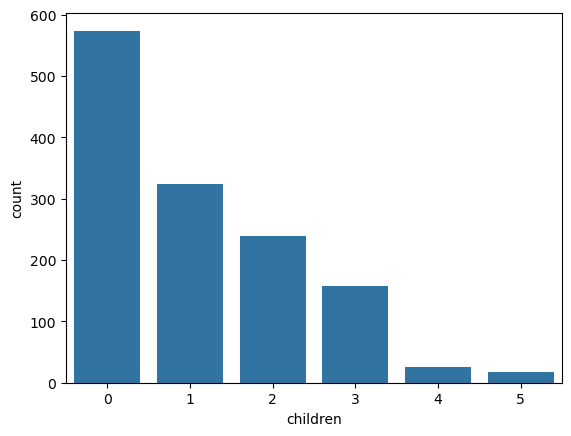

In [10]:
sns.countplot(x=data['children'])

<Axes: xlabel='sex', ylabel='count'>

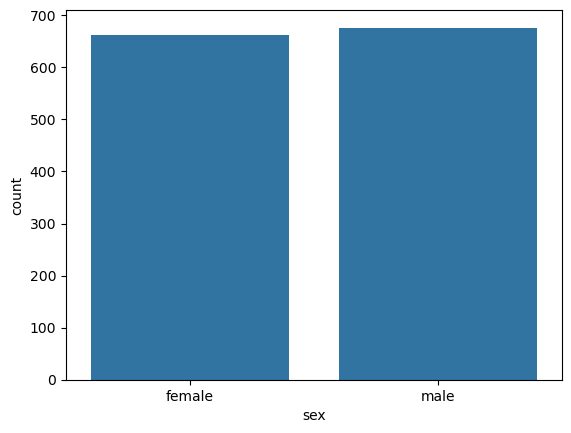

In [11]:
sns.countplot(x=data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

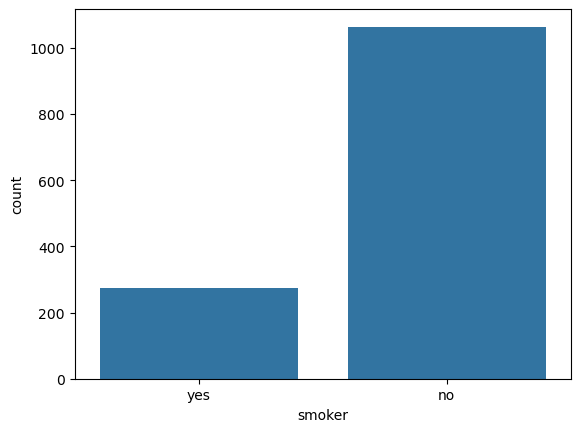

In [12]:
sns.countplot(x=data['smoker'])

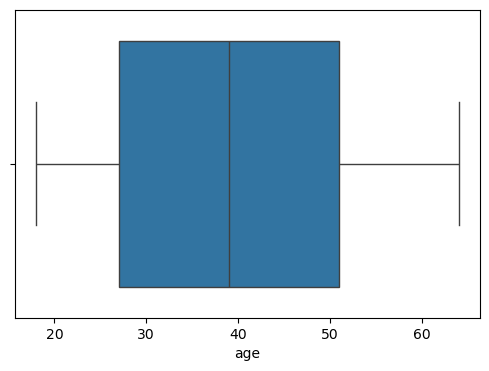

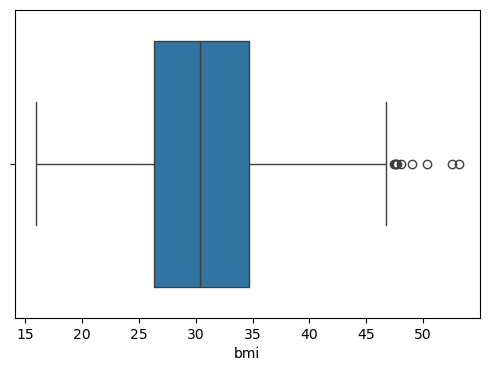

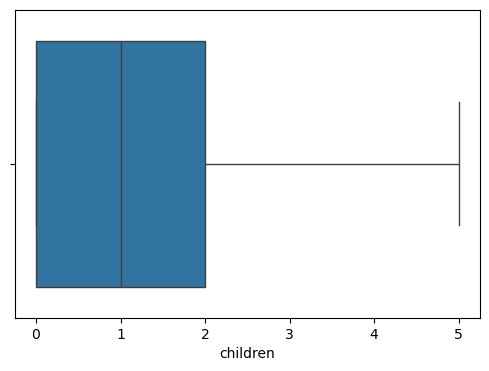

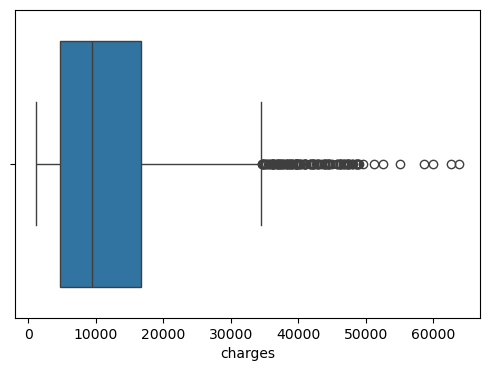

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])

<Axes: >

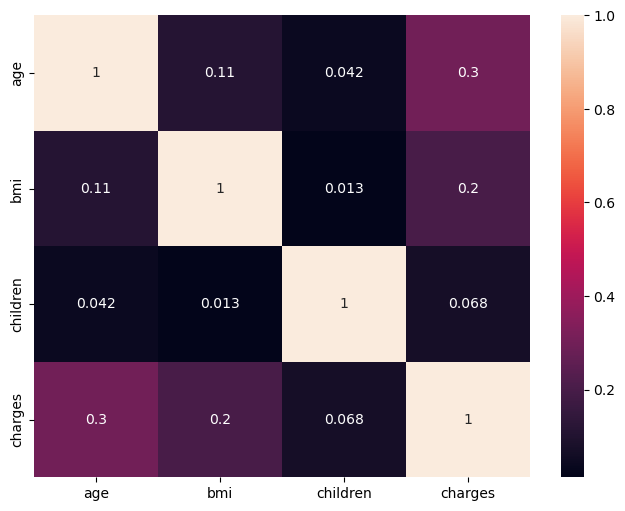

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing

In [15]:
df_cleaned = data.copy()

In [16]:
df_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [17]:
df_cleaned.shape

(1338, 7)

In [18]:
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned.shape

(1337, 7)

In [20]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
df_cleaned['sex'].value_counts()
df_cleaned

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [23]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})

In [24]:
df_cleaned.head()

age  sex     bmi  children smoker     region      charges
0   19    1  27.900         0    yes  southwest  16884.92400
1   18    0  33.770         1     no  southeast   1725.55230
2   28    0  33.000         3     no  southeast   4449.46200
3   33    0  22.705         0     no  northwest  21984.47061
4   32    0  28.880         0     no  northwest   3866.85520

In [25]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [26]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})

In [27]:
df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker":"is_smoker"
                        },inplace=True)


In [28]:
df_cleaned.head()

age  is_female     bmi  children  is_smoker     region      charges
0   19          1  27.900         0          1  southwest  16884.92400
1   18          0  33.770         1          0  southeast   1725.55230
2   28          0  33.000         3          0  southeast   4449.46200
3   33          0  22.705         0          0  northwest  21984.47061
4   32          0  28.880         0          0  northwest   3866.85520

In [29]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [30]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [31]:
df_cleaned.head()

age  is_female     bmi  children  is_smoker      charges  region_northwest  \
0   19          1  27.900         0          1  16884.92400             False   
1   18          0  33.770         1          0   1725.55230             False   
2   28          0  33.000         3          0   4449.46200             False   
3   33          0  22.705         0          0  21984.47061              True   
4   32          0  28.880         0          0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [32]:
df_cleaned=df_cleaned.astype(int)

In [33]:
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1337 rows x 9 columns]

# Model


In [35]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare features and target
X = df_cleaned.drop('charges', axis=1)  # Features (all columns except charges)
y = df_cleaned['charges']  # Target variable (charges)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (1337, 8)
Target shape: (1337,)

Feature columns:
['age', 'is_female', 'bmi', 'children', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest']


In [36]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Display some statistics about the target variable in train/test sets
print(f"\nTarget variable statistics:")
print(f"Training set - Mean: ${y_train.mean():.2f}, Std: ${y_train.std():.2f}")
print(f"Testing set - Mean: ${y_test.mean():.2f}, Std: ${y_test.std():.2f}")

Training set shape:
X_train: (1069, 8)
y_train: (1069,)

Testing set shape:
X_test: (268, 8)
y_test: (268,)

Target variable statistics:
Training set - Mean: $13029.71, Std: $11706.53
Testing set - Mean: $14271.51, Std: $13581.03
